## COMPARITIVE STUDY OF UNSUPERVISED LEARNING TECHNIQUE
In this Notebook, we compare some of the commonly used unsupervised clustering techniques on 'Mall Customers' dataset. The techniques we explore and compare are:
1. Kmeans
2. Hierarchical Clustering
3. Kmodes

## Data Preprocessing and Analysis


In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
#Importing the mall dataset with pandas

df = pd.read_csv('Mall_Customers.csv')
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Finding Data Distribution and Variable Correlations

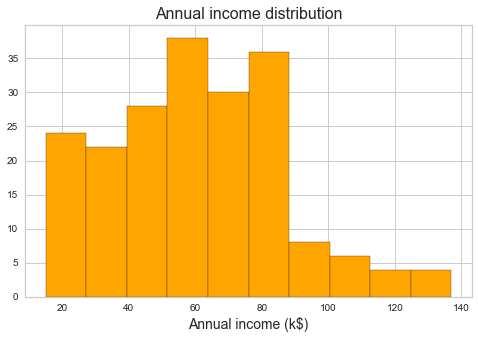

In [5]:
#Annual Income (k$)
plt.figure(figsize=(8,5))
plt.title("Annual income distribution",fontsize=16)
plt.xlabel ("Annual income (k$)",fontsize=14)
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color='orange',edgecolor='k')
plt.show()

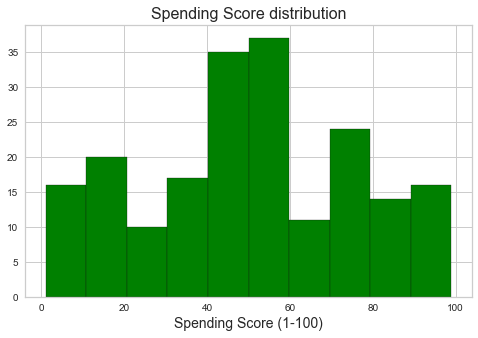

In [6]:
#Spending Score (1-100)
plt.figure(figsize=(8,5))
plt.title("Spending Score distribution",fontsize=16)
plt.xlabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.hist(df['Spending Score (1-100)'],color='green',edgecolor='k')
plt.show()

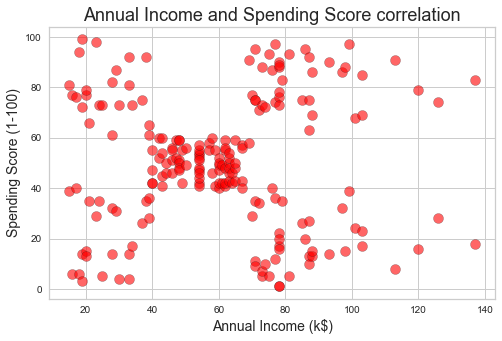

In [7]:
#definitive correlation between annual income and spending score
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

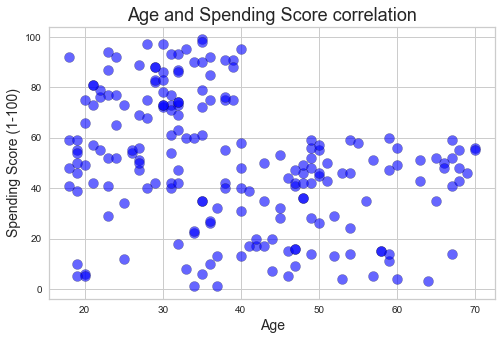

In [8]:
#correlation between age and spending score
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

In [9]:
# As there is no definite correlation between variables - we use Spending Score and Annual Income as features for our analysis

X = df.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']]

## K-Means

In [51]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 181363.595959596, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25095.703209997548, 21830.041978049434, 20736.679938924124]


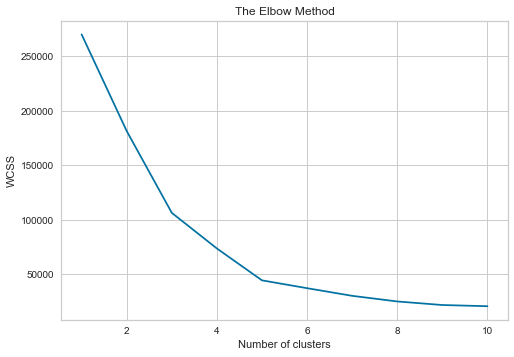

In [12]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Applying KMeans to the dataset with the optimal number of cluster - and printing the predicted cluster points

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

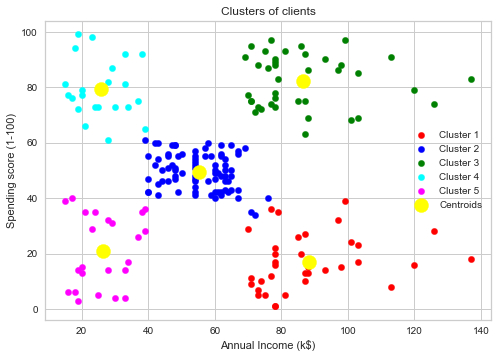

In [15]:
# Visualising the clusters

plt.scatter(X.iloc[Y_Kmeans == 0, 0], X.iloc[Y_Kmeans == 0,1],s = 40, c='red', label = 'Cluster 1')

plt.scatter(X.iloc[Y_Kmeans == 1, 0], X.iloc[Y_Kmeans == 1,1],s = 40, c='blue', label = 'Cluster 2')

plt.scatter(X.iloc[Y_Kmeans == 2, 0], X.iloc[Y_Kmeans == 2,1],s = 40, c='green', label = 'Cluster 3')

plt.scatter(X.iloc[Y_Kmeans == 3, 0], X.iloc[Y_Kmeans == 3,1],s = 40, c='cyan', label = 'Cluster 4')

plt.scatter(X.iloc[Y_Kmeans == 4, 0], X.iloc[Y_Kmeans == 4,1],s = 40, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering

In [16]:
#Dendograms
X = df.iloc[:,[3,4]].values

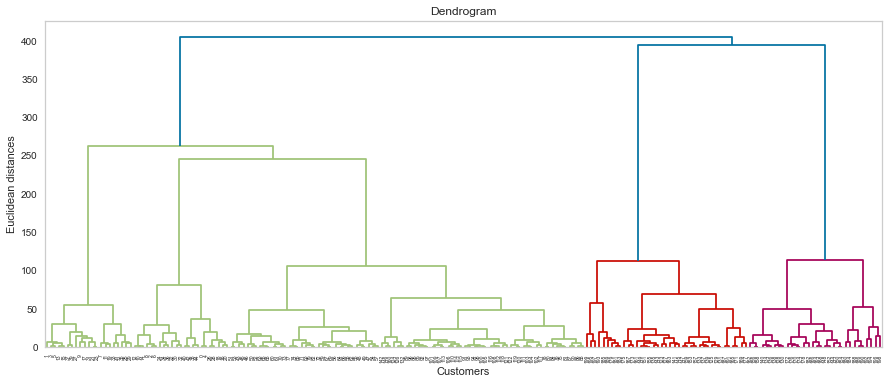

In [44]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.grid(False)
plt.show()

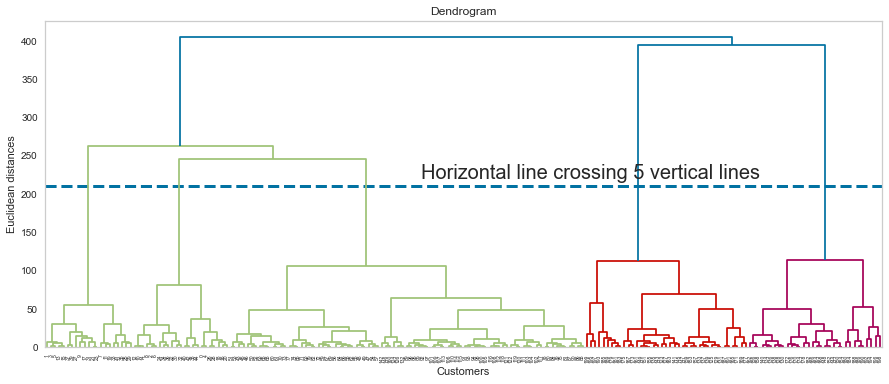

In [45]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=210,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.grid(False)
plt.show()

In [20]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(X)  

In [49]:
#Calculating Cluster points

from sklearn.neighbors import NearestCentroid

y_predict = hc.fit_predict(X)
#...
clf = NearestCentroid()
clf.fit(X, y_predict)
print(clf.centroids_)

[[89.40625    15.59375   ]
 [55.81176471 49.12941176]
 [86.53846154 82.12820513]
 [25.0952381  80.04761905]
 [26.30434783 20.91304348]]


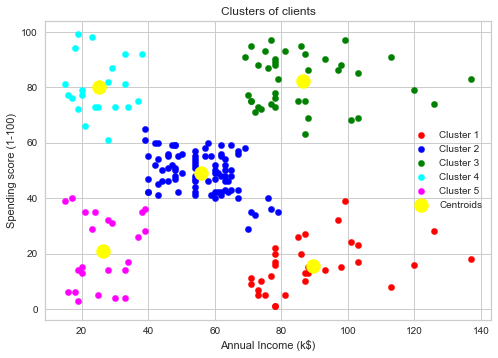

In [50]:
# Visualising the clusters

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0,1],s = 40, c='red', label = 'Cluster 1')

plt.scatter(X[y_pred == 1, 0], X[y_pred == 1,1],s = 40, c='blue', label = 'Cluster 2')

plt.scatter(X[y_pred == 2, 0], X[y_pred == 2,1],s = 40, c='green', label = 'Cluster 3')

plt.scatter(X[y_pred == 3, 0], X[y_pred == 3,1],s = 40, c='cyan', label = 'Cluster 4')

plt.scatter(X[y_pred == 4, 0], X[y_pred == 4,1],s = 40, c='magenta', label = 'Cluster 5')

plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], s = 200, c = 'yellow', label = 'Centroids')

plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

## K-Modes

In [22]:
#Installing Kmodes library from pypi
#pip install kmodes 

In [23]:
from kmodes.kmodes import KModes
KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)

KModes(n_clusters=5, n_init=1, verbose=1)

In [25]:
km_huang = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df)
# Predicted clusters
fitClusters_huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 66, cost: 732.0
Run 1, iteration: 2/100, moves: 2, cost: 731.0
Run 1, iteration: 3/100, moves: 0, cost: 731.0


array([3, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 4, 4, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 2, 3, 0, 0, 2, 2,
       0, 0, 3, 0, 2, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 3, 2, 2,
       2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 4, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 2], dtype=uint16)

In [26]:
cost = []

In [27]:
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 856.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 831.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 734.0


In [28]:
kmode = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
var1 =kmode.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 746.0


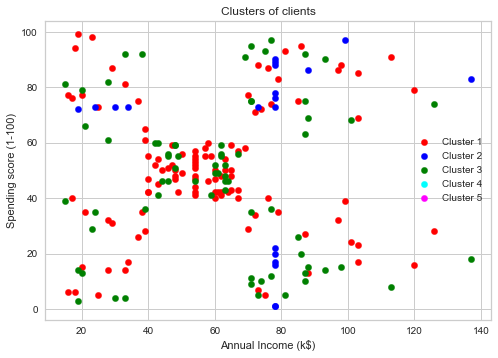

In [29]:
# Visualising the clusters

plt.scatter(X[var1 == 0, 0], X[var1 == 0,1],s = 40, c='red', label = 'Cluster 1')

plt.scatter(X[var1 == 1, 0], X[var1 == 1,1],s = 40, c='blue', label = 'Cluster 2')

plt.scatter(X[var1 == 2, 0], X[var1 == 2,1],s = 40, c='green', label = 'Cluster 3')

plt.scatter(X[var1 == 3, 0], X[var1 == 3,1],s = 40, c='cyan', label = 'Cluster 4')

plt.scatter(X[var1 == 4, 0], X[var1 == 4,1],s = 40, c='magenta', label = 'Cluster 5')

# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

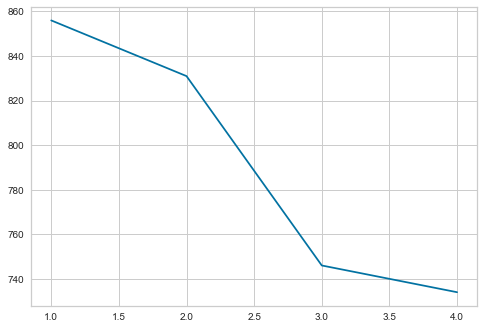

In [43]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

By the above scatter plot we can infer that k mode is not applicable  as scatter pot is uneven due to dataset

## Calculating Performace Measure

We shall calculate the performance measure of the clusters formed by the techniques using:
1. Silhouette Score
2. Calinski-Harabasz Index

### K-Means

#### Silhoutte

In [31]:
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
score

0.553931997444648

#### Calinski-Harabasz Index

In [34]:
from sklearn.metrics import calinski_harabasz_score

chs = calinski_harabasz_score(X, kmeans.labels_)
chs

247.35899338037282

### Heirarchical Clustering

#### Silhoutte

In [35]:
score = silhouette_score(X, hc.labels_, metric='euclidean')
score

0.5529945955148897

#### Calinski-Harabasz Index

In [39]:
from sklearn.metrics import calinski_harabasz_score

chs = calinski_harabasz_score(X, hc.labels_)
chs

243.07142892964563

### K-Modes

#### Silhoutte

In [40]:
score = silhouette_score(X, kmode.labels_, metric='euclidean')
score

-0.0075201045499752065

#### Calinski-Harabasz Index

In [42]:
from sklearn.metrics import calinski_harabasz_score

chs = calinski_harabasz_score(X, kmode.labels_)
chs

2.2436099098668287